In [18]:
import pandas as pd
import numpy as np
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from itertools import combinations
from collections import Counter

from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report

import plotly.graph_objs as go
import plotly.plotly as py
from plotly.graph_objs import *

import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
!ls ../data/

database.sqlite             fatality_facts_nona_two.csv
fatality_facts_nona.csv


In [4]:
fatal_nona_two = pd.read_csv('../data/fatality_facts_nona_two.csv',  index_col=0)

/Users/guillermogonzalez/miniconda3/envs/ga/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [5]:
fatal_nona_two.shape

(1069871, 244)

In [6]:
# These are the continuous and categorical columns.
# This code was used in the encoding to create the imported csv file above; keeping for tracking purposes
encode_columns = ['year', 'bodytype','dvbasis','make','modelyr',
                   'bagdeply', 'bagfail', 'chtype','manfail','manuse', 
                   'role', 'seatpos', 'sex']

continuous_columns = ['dof1','dvest','dvtotal','age','height','weight',
                     'gad1_B', 'gad1_F','gad1_L', 'gad1_R', 'gad1_T', 'gad1_U']

In [8]:
# X features dropping the target and all features that get dummies were performed on
y = fatal_nona_two['injsev']
X = fatal_nona_two.copy().drop(['year', 'bodytype','dvbasis','make','modelyr',
                   'bagdeply', 'bagfail', 'chtype','manfail','manuse', 
                   'role', 'seatpos', 'sex','injsev','gad1'], axis=1)

# train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
models = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LinearSVC(random_state=42),
    DecisionTreeClassifier(random_state=42)
]

In [17]:
cv = 5
cv_df = pd.DataFrame(index=range(cv * len(models)))
entries = []
for i,model in enumerate(models):
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)
    print(i)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

0
1
2
3


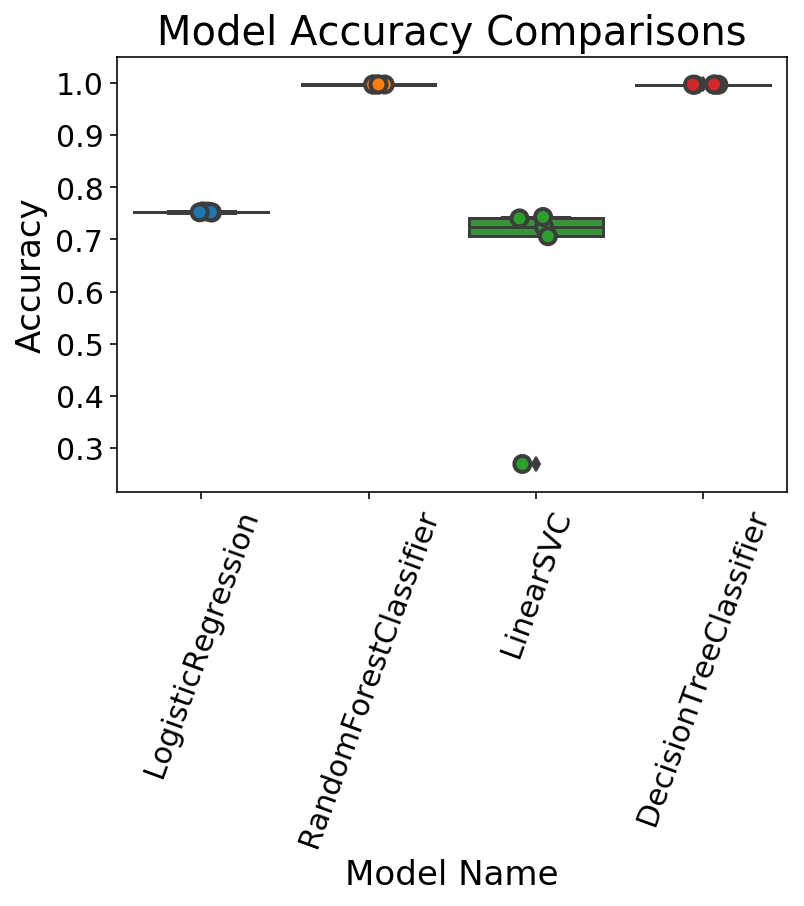

In [27]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=70)
plt.title('Model Accuracy Comparisons', fontsize=20)
plt.xlabel('Model Name', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()